In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

importamos el dataset luego del etl

In [2]:
df = pd.read_csv('df_directores.csv', index_col='Unnamed: 0')
df.head(3)

,belongs_to_collection,budget,id,original_language,popularity,production_countries,release_date,revenue,runtime,spoken_languages,...,vote_count,genero1,genero2,prcompany1,prcompany2,country,language,release_year,return,director
0,Toy Story Collection,30000000,862,en,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,5415.0,Animation,Comedy,Pixar Animation Studios,NaN,United States of America,English,1995,12.451801,John Lasseter
1,NaN,65000000,8844,en,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,2413.0,Adventure,Fantasy,TriStar Pictures,Teitler Film,United States of America,Français,1995,4.043035,Joe Johnston
2,Grumpy Old Men Collection,0,15602,en,11.712900,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,92.0,Romance,Comedy,Warner Bros.,Lancaster Gate,United States of America,English,1995,0.000000,Howard Deutch


Hagamos un describe para que datos interesantes podemos sacar.

In [4]:
df.describe(include='all')

,belongs_to_collection,budget,id,original_language,popularity,production_countries,release_date,revenue,runtime,spoken_languages,...,vote_count,genero1,genero2,prcompany1,prcompany2,country,language,release_year,return,director
count,5126,4.863200e+04,48632.000000,48618,48632.000000,48632,48632,4.863200e+04,48414.000000,48632,...,48632.000000,46372,30596,36464,18499,42449,44607,48632.000000,4.863200e+04,48632
unique,1682,NaN,NaN,89,NaN,2370,17163,NaN,NaN,1912,...,NaN,20,20,10489,8987,140,71,NaN,NaN,19558
top,The ABCs of Death Collection,NaN,NaN,en,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-01,NaN,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",...,NaN,Drama,Drama,Paramount Pictures,Warner Bros.,United States of America,English,NaN,NaN,John Ford
freq,87,NaN,NaN,34436,NaN,19359,150,NaN,NaN,24067,...,NaN,12395,6724,1037,280,22036,25474,NaN,NaN,68
mean,NaN,4.342508e+06,107759.458566,NaN,3.000701,NaN,NaN,1.170253e+07,94.765047,NaN,...,113.499342,NaN,NaN,NaN,NaN,NaN,NaN,1991.893527,6.160467e+02,NaN
std,NaN,1.784737e+07,112101.659256,NaN,6.578260,NaN,NaN,6.656266e+07,41.626450,NaN,...,497.239081,NaN,NaN,NaN,NaN,NaN,NaN,24.266083,7.214969e+04,NaN
min,NaN,0.000000e+00,2.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1874.000000,0.000000e+00,NaN
25%,NaN,0.000000e+00,26043.500000,NaN,0.410806,NaN,NaN,0.000000e+00,85.000000,NaN,...,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,1978.000000,0.000000e+00,NaN
50%,NaN,0.000000e+00,59436.500000,NaN,1.173781,NaN,NaN,0.000000e+00,94.000000,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,2001.000000,0.000000e+00,NaN
75%,NaN,0.000000e+00,156910.250000,NaN,3.832866,NaN,NaN,0.000000e+00,107.000000,NaN,...,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,0.000000e+00,NaN


Podemos sacar varios datos interesantes de este describe, como el retorno promedio el cual podemos ver que es positivo y la duracion promedio de las peliculas que son 94.7 minutos

In [5]:
df.dtypes

belongs_to_collection     object
budget                     int64
id                         int64
original_language         object
popularity               float64
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
title                     object
vote_average             float64
vote_count               float64
genero1                   object
genero2                   object
prcompany1                object
prcompany2                object
country                   object
language                  object
release_year               int64
return                   float64
director                  object
dtype: object

In [6]:
df['genero1'].value_counts()

Drama              12395
Comedy              9442
Action              4794
Documentary         3975
Horror              2931
Thriller            1737
Crime               1727
Adventure           1658
Animation           1522
Romance             1243
Fantasy              829
Science Fiction      702
Mystery              587
Family               580
Music                547
Western              467
War                  410
TV Movie             398
History              308
Foreign              120
Name: genero1, dtype: int64

Podemos ver que las películas de drama junto con las de comedia son las mas numerosas en el dataset, veamoslo mejor con un grafico de barras

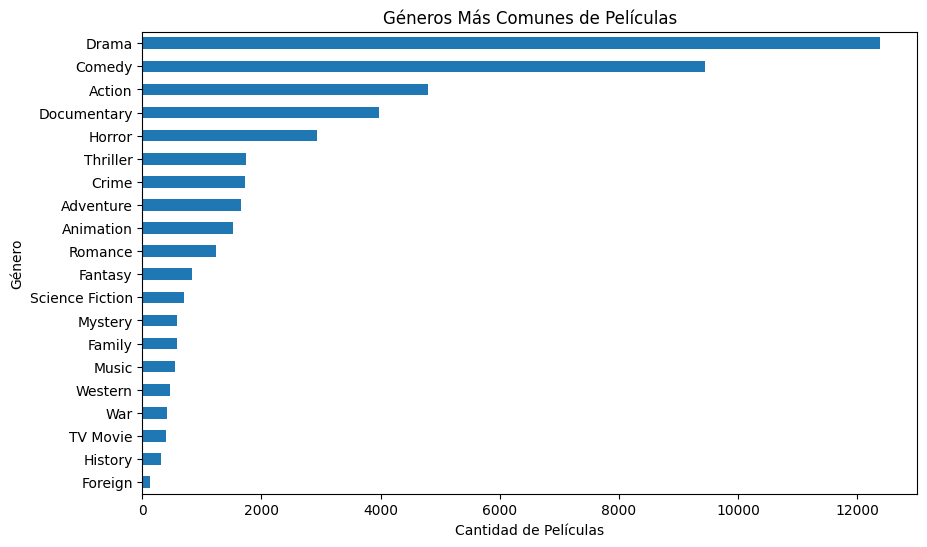

In [5]:
# Quiero hacer una grafica de los generos mas comunes de peliculas asi que hago un conteo de los valores que hay en generos
genero_counts = df['genero1'].value_counts()

# Creo una gráfica de barras horizontales
plt.figure(figsize=(10, 6))
genero_counts.plot(kind='barh')


plt.title('Géneros Más Comunes de Películas')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Género')
plt.gca().invert_yaxis()  
#Invierto el axis y para que salga en orden descendente

plt.show()

Para mi sorpresa personal podemos ver que las peliculas documentales tambien son muy numerosas en el dataset

Veamos ahora los generos con mayor popularidad

In [9]:
df['popularity'] = df['popularity'].astype(int)
df['genero1'] = df['genero1'].astype(str)

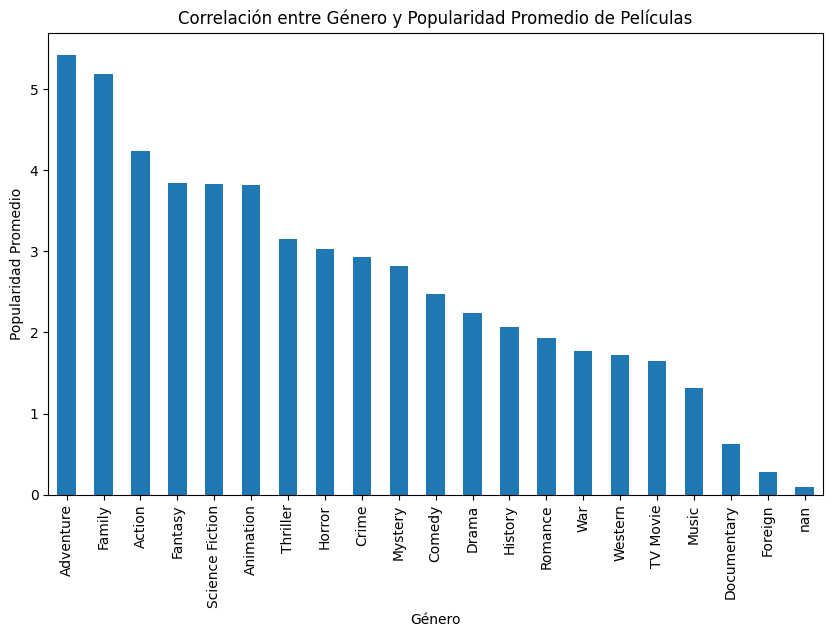

In [12]:
# Agrupo la popularidad promedio por cada genero
popularidad_promedio_por_genero = df.groupby('genero1')['popularity'].mean()
# Los ordeno de manera descendente para que se vea mejor en la grafica
popularidad_promedio_por_genero = popularidad_promedio_por_genero.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
popularidad_promedio_por_genero.plot(kind='bar')

plt.title('Correlación entre Género y Popularidad Promedio de Películas')
plt.xlabel('Género')
plt.ylabel('Popularidad Promedio')

plt.show()

Veamos la evolucion de la ganancia y el presupuesto con el paso de los años

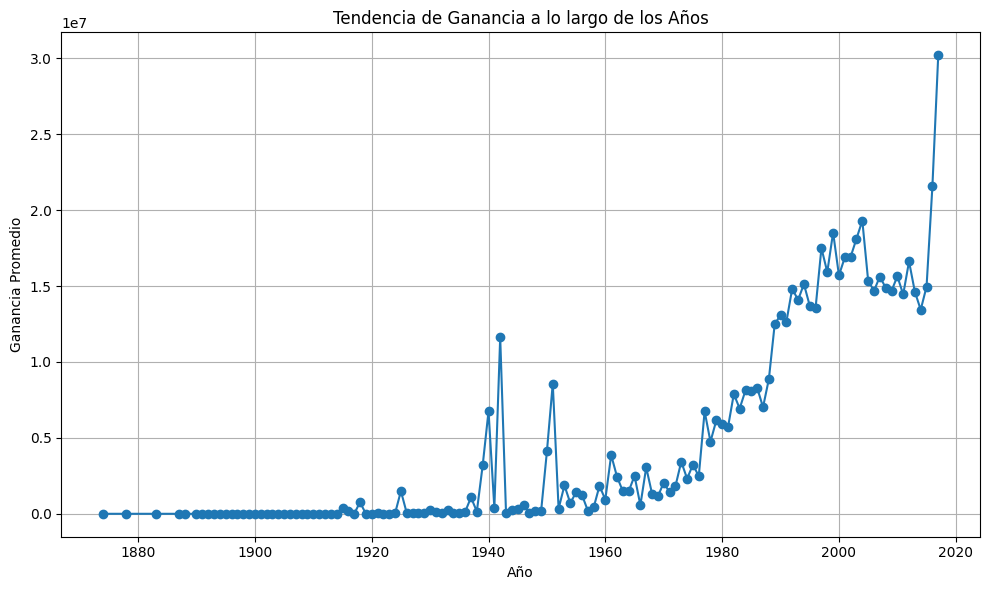

In [40]:
#agrupamos por año la ganancia promedio
tendencia_ganancia = df.groupby('release_year')['revenue'].mean()

plt.figure(figsize=(10, 6))
plt.plot(tendencia_ganancia.index, tendencia_ganancia.values, marker='o', linestyle='-')

plt.title('Tendencia de Ganancia a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Ganancia Promedio')
plt.grid(True)

plt.tight_layout()
plt.show()

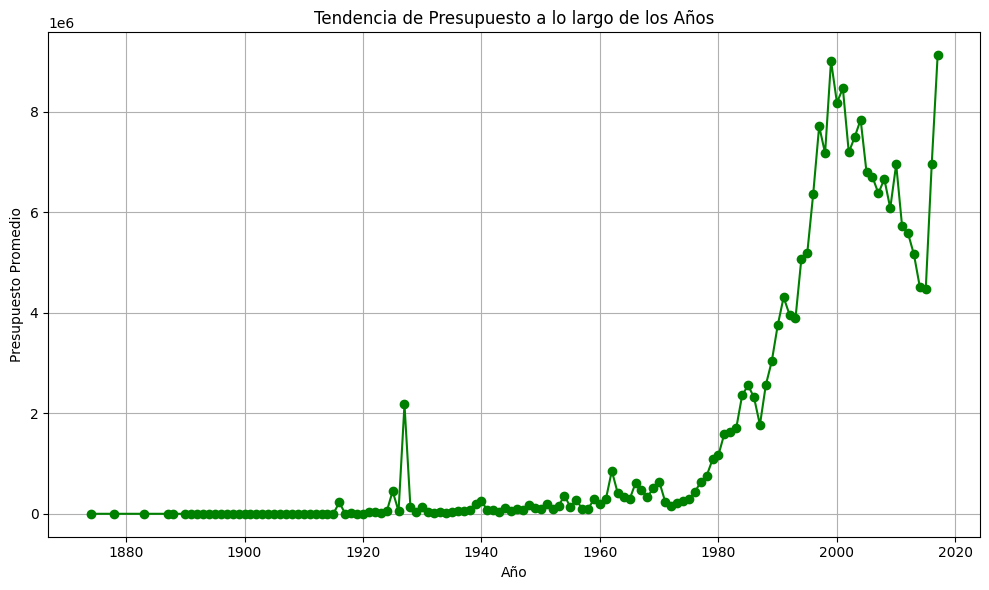

In [43]:
# Agrupamos por año el presupuesto primedio
tendencia_presupuesto = df.groupby('release_year')['budget'].mean()

# Graficamos la serie creada anteriormente
plt.figure(figsize=(10, 6))
plt.plot(tendencia_presupuesto.index, tendencia_presupuesto.values, marker='o', linestyle='-', color='g')

plt.title('Tendencia de Presupuesto a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Presupuesto Promedio')
plt.grid(True)

plt.tight_layout()
plt.show()

Podemos observar como con el paso de los años la industria se a hecho cada vez mas grande, teniendo un salto masivo en presupuesto y ganancia a partir de los años 80, aunque como podemos observar existen datos outliers tanto en el presupuesto como en la ganancia, sobre todo en la ganancia, podemos suponer que fueron películas que marcaron esa epoca. Tambien podemos concluir que el año de lanzamiento esta relacionado a la ganancia/presupuesto de la misma

veamos la correlacion existente entre presupuesto y ganancia (mayor presupuesto = mayor ganacia?).

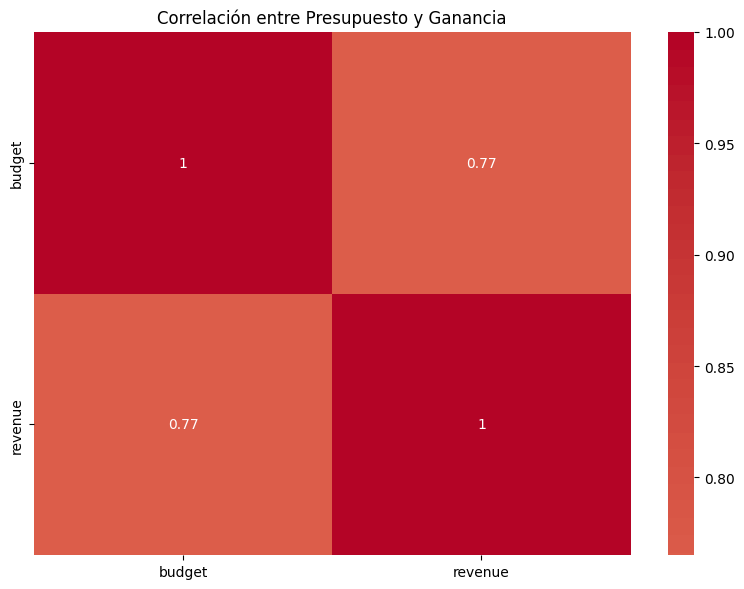

In [49]:
correlation_matrix = df[['budget', 'revenue']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlación entre Presupuesto y Ganancia')


plt.tight_layout()
plt.show()

Efectivamente existe una alta correlacion entre el presupuesto y la ganancia de una pelicula

Veamos la relacion entre el presupuesto de una pelicula y su duración con un grafico de dispersion

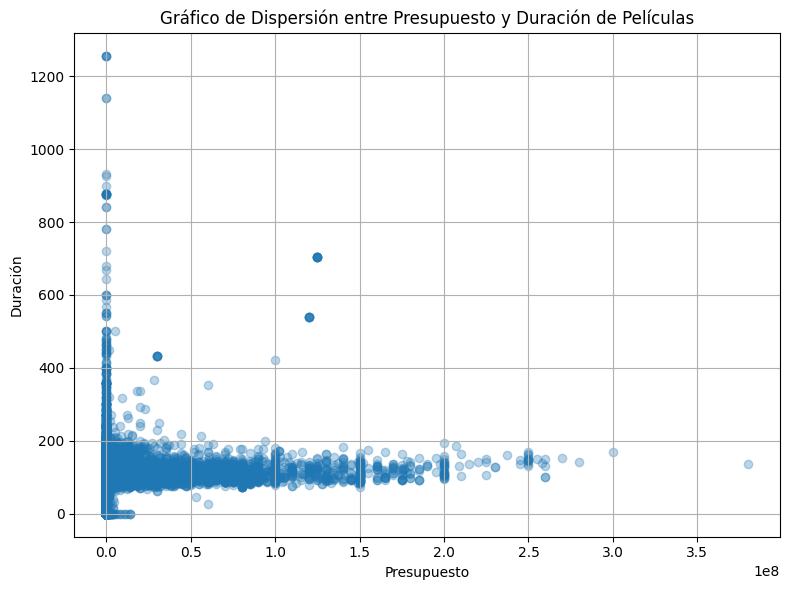

In [57]:
# Un grafico de dispersion servira para este grafico
plt.figure(figsize=(8, 6))
plt.scatter(df['budget'], df['runtime'], alpha=0.3)

plt.title('Relacion entre Presupuesto y Duración de Películas')
plt.xlabel('Presupuesto')
plt.ylabel('Duración')
plt.grid(True)

plt.tight_layout()
plt.show()


Veamos que productoras tienen la mayor cantidad de peliculas

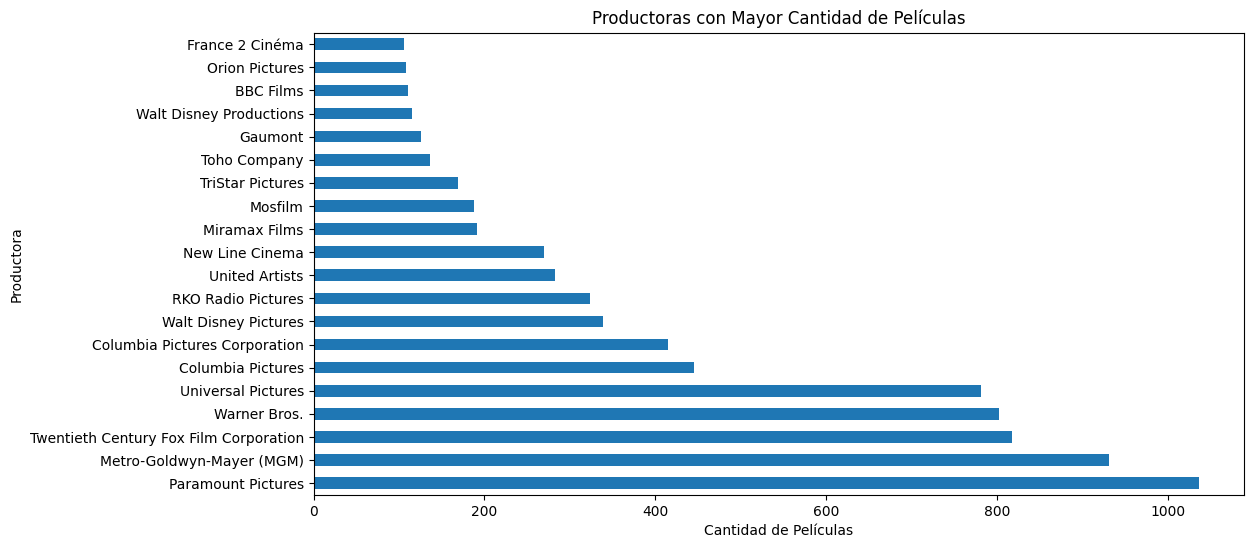

In [20]:
productora_counts = df['prcompany1'].value_counts()

# Seleccionamos las productoras con la mayor cantidad de películas, en este caso 20
top_productoras = productora_counts.head(20)  

plt.figure(figsize=(12, 6))
top_productoras.plot(kind='barh')

plt.title('Productoras con Mayor Cantidad de Películas')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Productora')

plt.show()

Veamos el top de países mas productores de peliculas (spoiler: Estados Unidos estara de primero)

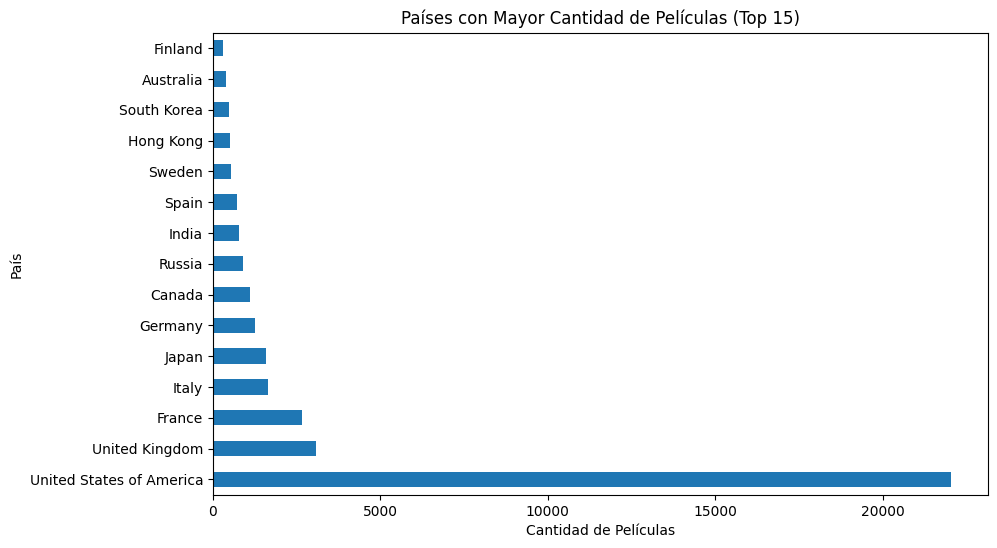

In [36]:
# Contamos la cantidad de películas por país
pais_counts = df['country'].value_counts()

top_paises = pais_counts.head(15)  

# Quiero hacer un grafico de barras horizontales
plt.figure(figsize=(10, 6))
top_paises.plot(kind='barh')

plt.title('Países con Mayor Cantidad de Películas (Top 15)')
plt.xlabel('Cantidad de Películas')
plt.ylabel('País')

plt.show()

# Podemos sacar conclusiones interesantes de este EDA.
se pudo observar como evoluciono el cine con los años, los generos de peliculas mas numerosos y populares y algunas relaciones entre columnas, sin embargo este EDA no me sera muy util para el modelo de recomendacion, ya que sera uno basado en contenido
y lo haré con el metodo de cosine similarity usando como referencia la columna overview.
